In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import copy
import json
from tqdm import tqdm
import pickle
import logging
import math
import matplotlib
from re import S
from scipy.stats.stats import pearsonr  
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')


This data is kept private as it can reveal participant information.

In [2]:
df = pd.read_csv('../data/copilot_post_survey.csv')

In [12]:
# df['Is there anything else you would like to add about your experience with Copilot?']
# print each answer
for i in range(len(df)):
    # only print if not nan
    if df['Is there anything else you would like to add about your experience with Copilot?'][i] == df['Is there anything else you would like to add about your experience with Copilot?'][i]:
        print(f'Participant  {i} :')
        print(df['Is there anything else you would like to add about your experience with Copilot?'][i])

Participant  2 :
I enjoyed how it didn't automatically generate the code that I needed to use, I enjoyed that I felt like I was leading the interaction with the tool rather than being fully dependent on it. This was my first time coding with copilot assistance and it was a fun experience to learn how it works.
Participant  3 :
I have never used Copilot before but really enjoyed collaborating with it. I haven't analyzed data using Python for a couple months now so all of the functions I would usually use slipped my mind. Collaborating with Copilot felt like I was googling what I wanted to do except instead of going through several stack overflow links that Google would show me, the code just appeared inline saving me time and keeping my flow of coding. Looking forward to using Copilot more in the future now! 
Participant  6 :
Going into the exercise I genuinely thought there would be a point when I pull up stack overflow. Because that's the kind of tiny stuff you sometimes need to searc

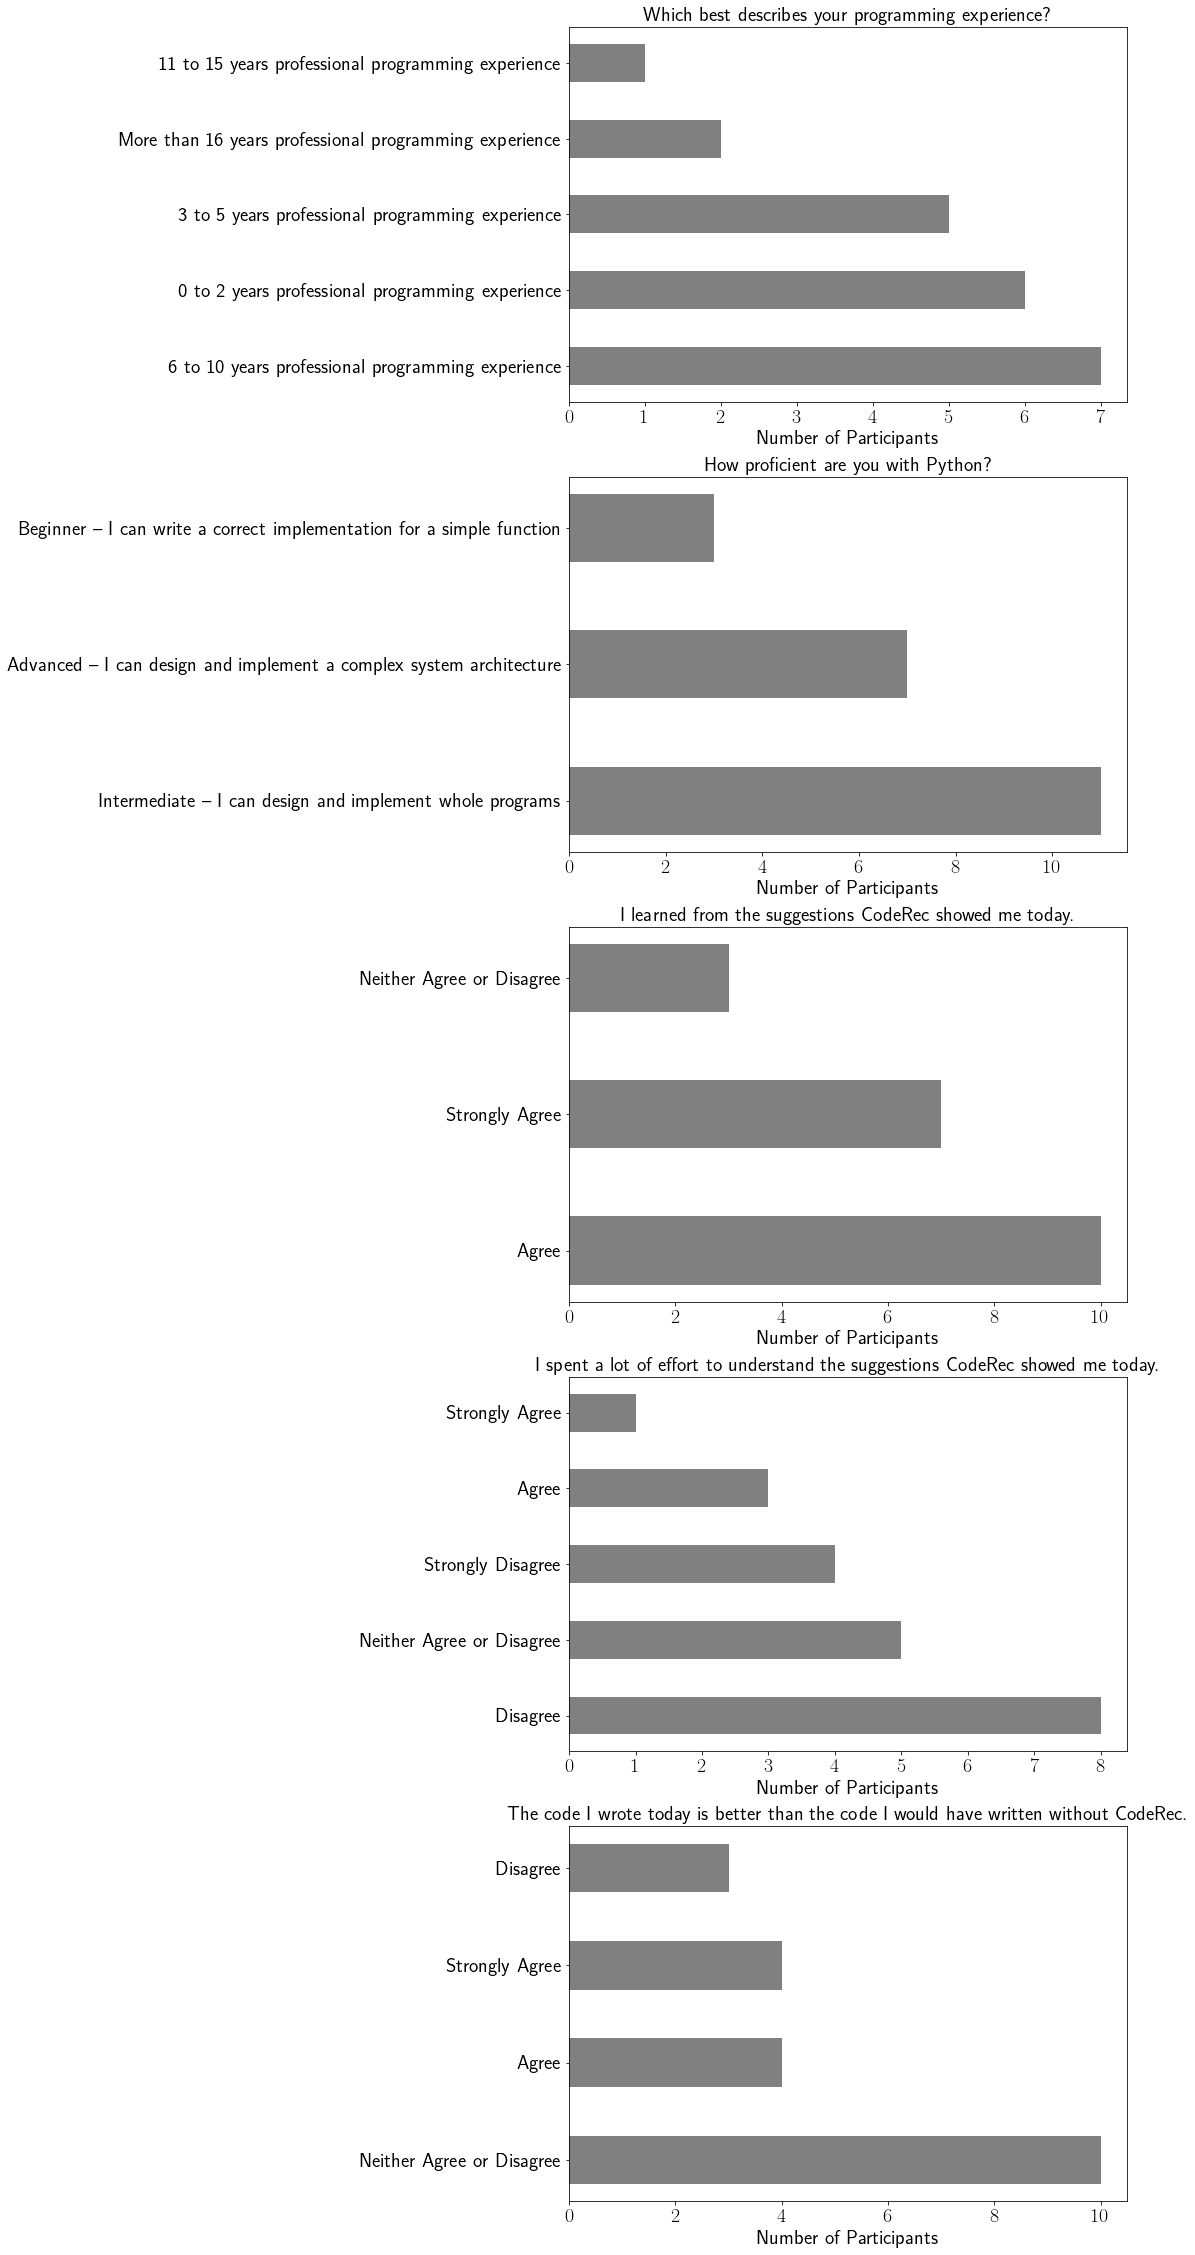

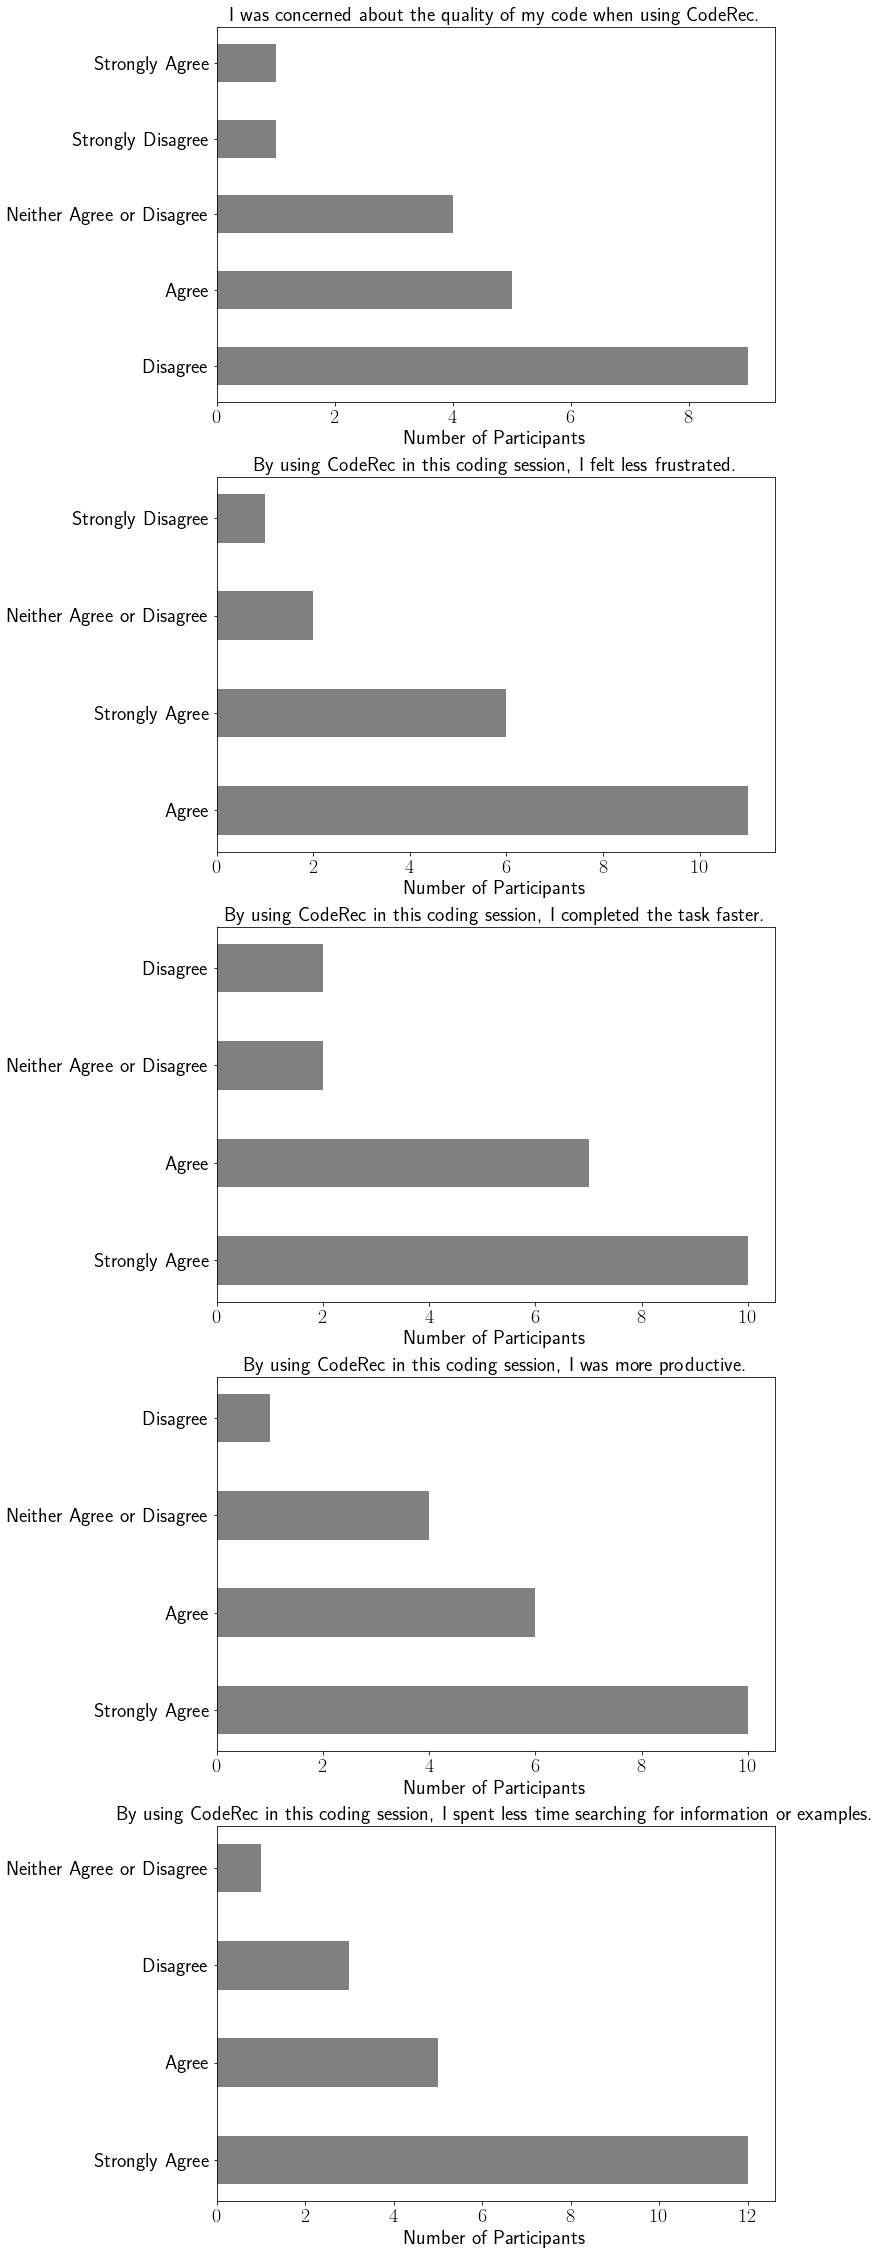

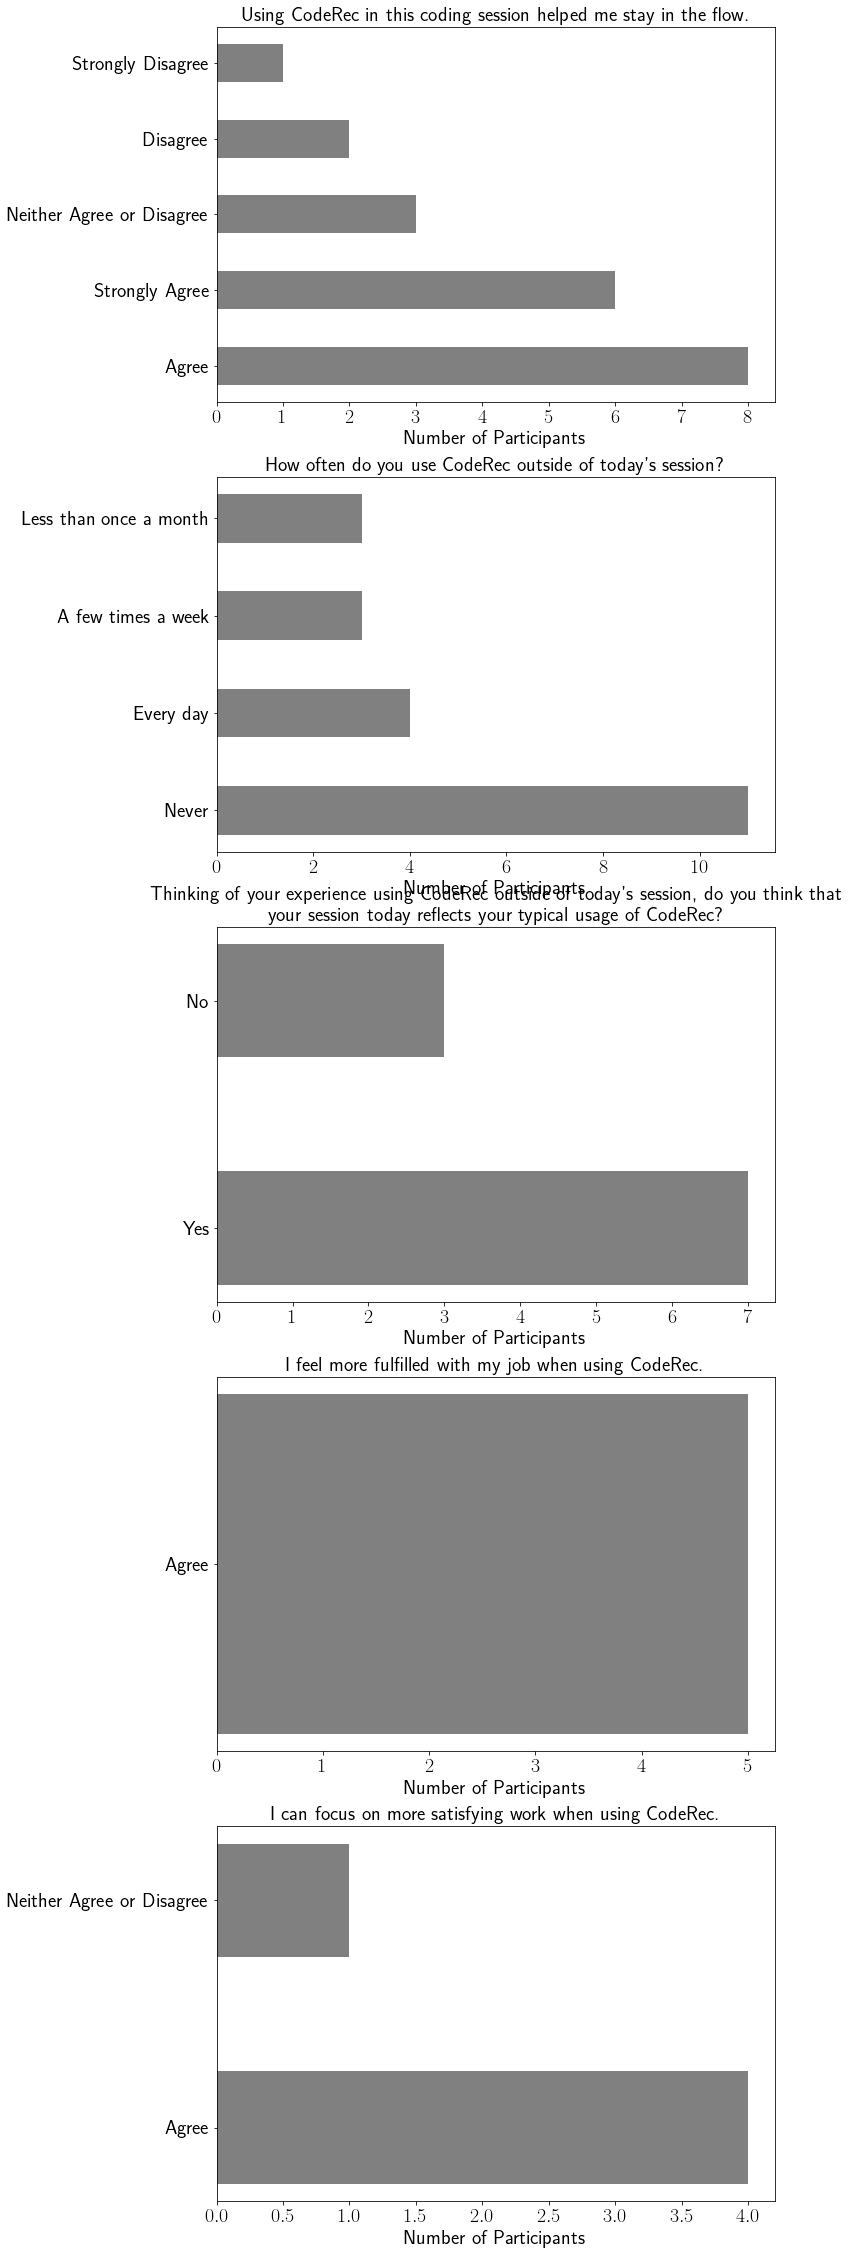

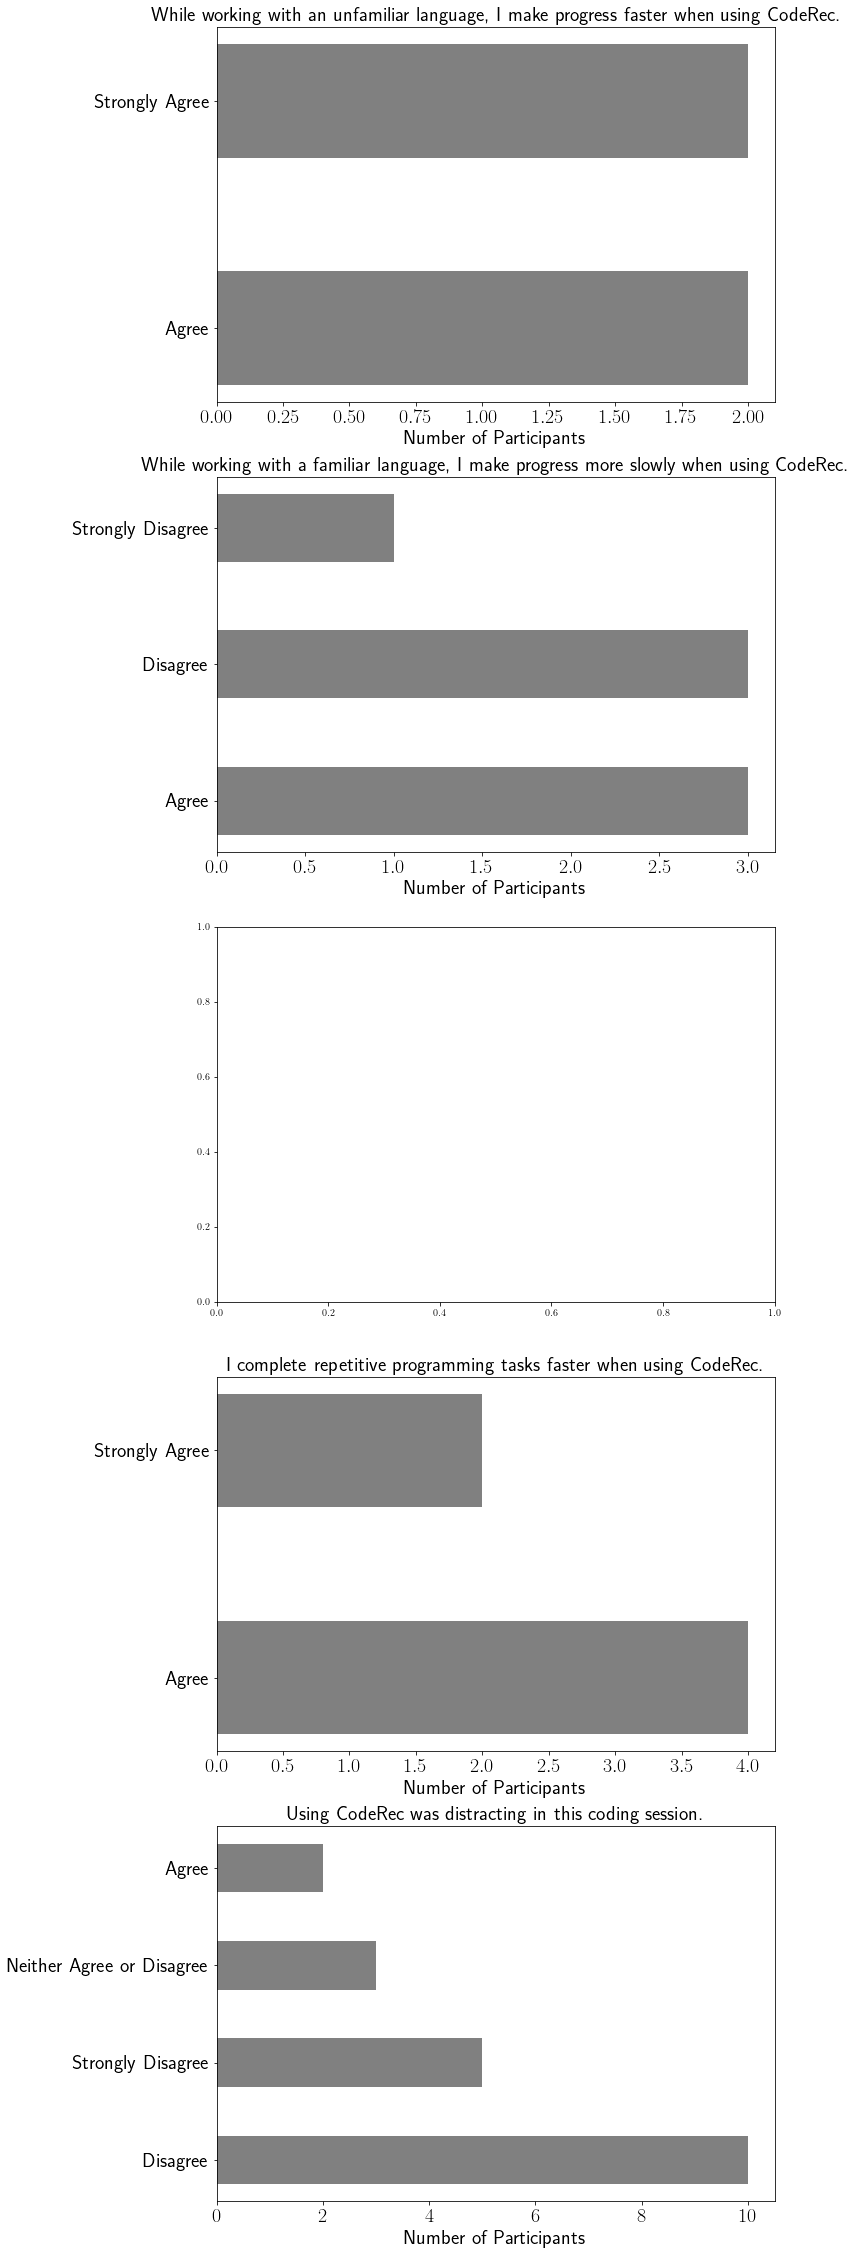

In [9]:
# make a subplots of the first 20 questions

for figure_save in range(4):
    fig, axs = plt.subplots(5, 1, figsize=(10, 40))
    column_ids = list(range(figure_save*5, (figure_save+1)*5))
    for i, column_id in enumerate(column_ids):
        
        # get the column name
        col_name = df.columns[column_id]
        if 'Is there anything else you would like' in col_name:
            continue

        # get the column values
        col_values = df[col_name].value_counts()
        # get the column values as a list
        col_values_list = col_values.tolist()
        # get the column index as a list
        col_index_list = col_values.index.tolist()
        # get the column index as a list
        col_index_list = [str(j) for j in col_index_list]
        # create horizontal bar chart with colors from bad to good but dont sort
        axs[i].barh(col_index_list, col_values_list, height = 0.5, color='grey')
        # set the title
        col_name = col_name.replace('Copilot', 'CodeRec')
        col_name = col_name.replace('copilot', 'CodeRec')

        axs[i].set_title(col_name, fontsize = 20)
        # increase font size of y ticks
        axs[i].tick_params(axis='y', labelsize=20)
        # increase font size of x ticks
        axs[i].tick_params(axis='x', labelsize=20)
        # set the x label
        # set the y label
        axs[i].set_xlabel('Number of Participants', fontsize = 20)
    # save figure to pdf
    plt.savefig('all_questions'+str(figure_save)+'.pdf', bbox_inches='tight')